In [12]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

conn = sqlite3.connect(os.path.join(os.getcwd(),"works.db"))
result = pd.read_sql_query("select * from work;", conn)


In [6]:
key_salary = result.groupby(['salary']).groups

In [3]:
key_salary

{'$1,000 - $1,300': Int64Index([240], dtype='int64'),
 '$1,000 - $1,500': Int64Index([253, 294, 324, 354, 423, 496], dtype='int64'),
 '$1,000 - $2,000': Int64Index([4, 16, 25, 239, 395, 440, 473], dtype='int64'),
 '$1,000 - $3,000': Int64Index([362, 396], dtype='int64'),
 '$1,200 - $1,500': Int64Index([349], dtype='int64'),
 '$1,200 - $2,000': Int64Index([365], dtype='int64'),
 '$1,200 - $2,200': Int64Index([404], dtype='int64'),
 '$1,300 - $2,000': Int64Index([399], dtype='int64'),
 '$1,500 - $1,800': Int64Index([355], dtype='int64'),
 '$1,500 - $2,000': Int64Index([371, 373, 444], dtype='int64'),
 '$1,500 - $3,000': Int64Index([302], dtype='int64'),
 '$1,800 - $2,000': Int64Index([350], dtype='int64'),
 '$1,800 - $2,500': Int64Index([2], dtype='int64'),
 '$15,000,000 - $25,000,000': Int64Index([15], dtype='int64'),
 '$2,000 - $2,500': Int64Index([351, 376], dtype='int64'),
 '$3,000 - $4,500': Int64Index([327], dtype='int64'),
 '$350 - $450': Int64Index([437], dtype='int64'),
 '$400 -

In [75]:
salary = result['salary'].tolist()

In [76]:
salary

['$700 - $1,000',
 'Up to $3,000',
 '$1,800 - $2,500',
 '$600 - $1,200',
 '$1,000 - $2,000',
 'Negotiable',
 '$600 - $1,200',
 'Up to $3,000',
 'Up to $1,200',
 '$800 - $1,100',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Up to $1,000',
 'Up to $1,600',
 '$15,000,000 - $25,000,000',
 '$1,000 - $2,000',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 '$1,000 - $2,000',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 '$600 - $1,200',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Up to $1,000',
 'Negotiable',
 'Negotiable',
 'Up to $1,500',
 'Up to $1,000',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Up to $1,500',
 'Up to $1,000',
 'Up to $1,500',
 'Negotiable',
 'Up to $1,500',
 'Up to $2,000',
 'Negotiable',
 'Negotiable',
 'Negotia

In [88]:
p_negotiable = re.compile('Negotiable|Thương lượng|Cạnh tranh|Thỏa thuận')
list_negotiable = []
list_none = []
for item in salary:
    if item is not None:
        x = p_negotiable.findall(item)
        if len(x) != 0:
            list_negotiable.append(item)
    else:
        list_none.append(item)

        
    

In [89]:
list_negotiable

['Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiab

In [90]:
list_none

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [91]:
b = set(salary) - set(list_none) - set(list_negotiable) - set(list_salary_up_to)

In [93]:
b = list(b)

In [94]:
b

['$700 - $1,700',
 '10,000,000 VNĐ - 14,000,000 VNĐ',
 '4.500.000 - 7.000.000 VND',
 '8.000.000 - 10.000.000 VND',
 '$400 - $800',
 '$1,000 - $2,000',
 '$8,000,000 - $15,000,000',
 '$2,000 - $2,500',
 '8 triệu - 15 triệu',
 '$500 - $900',
 '7 triệu - 12 triệu',
 '15.000.000 - 30.000.000 VND',
 '$500 - $1,000',
 '8 triệu - 12 triệu',
 '3 triệu - 6 triệu',
 '$1,000 - $1,500',
 '$1,200 - $1,500',
 '4.000.000 - 6.000.000 VND',
 '$3,000 - $4,500',
 '7.000.000 - 10.000.000 VND',
 '6.000.000 - 8.000.000 VND',
 '10.000.000 - 20.000.000 VND',
 '9 triệu - 12 triệu',
 '$1,800 - $2,000',
 '25 triệu - 30 triệu',
 '$700 - $1,200',
 '15.000.000 - 20.000.000 VND',
 '5 triệu - 7 triệu',
 '$550 - $1,000',
 '$1,800 - $2,500',
 '10 triệu - 15 triệu',
 '$500 - $800',
 '20.000.000 - 25.000.000 VND',
 '10 triệu - 14 triệu',
 '1 triệu - 3 triệu',
 '$1,000 - $3,000',
 '8.000.000 - 15.000.000 VND',
 '3 triệu - 5 triệu',
 '7.000.000 - 9.000.000 VND',
 '$700 - $1,000',
 '6 triệu - 10 triệu',
 '5.000.000 - 7.000.0

In [100]:
p_d =  re.compile(r'\d+')
b = [i.split(' - ') for i in b]
list_job_sal = []
for i in b:
    x = p_d.findall(i)
    if len(x) > 1:
        h = ''
        for i in x:
            h += i
        list_job_sal.append(h)
    else:
        list_job_sal.append(x[0])
  
    

i = $700 - $1,700, x = ['700', '1', '700']
i = 10,000,000 VNĐ - 14,000,000 VNĐ, x = ['10', '000', '000', '14', '000', '000']
i = 4.500.000 - 7.000.000 VND, x = ['4', '500', '000', '7', '000', '000']
i = 8.000.000 - 10.000.000 VND, x = ['8', '000', '000', '10', '000', '000']
i = $400 - $800, x = ['400', '800']
i = $1,000 - $2,000, x = ['1', '000', '2', '000']
i = $8,000,000 - $15,000,000, x = ['8', '000', '000', '15', '000', '000']
i = $2,000 - $2,500, x = ['2', '000', '2', '500']
i = 8 triệu - 15 triệu, x = ['8', '15']
i = $500 - $900, x = ['500', '900']
i = 7 triệu - 12 triệu, x = ['7', '12']
i = 15.000.000 - 30.000.000 VND, x = ['15', '000', '000', '30', '000', '000']
i = $500 - $1,000, x = ['500', '1', '000']
i = 8 triệu - 12 triệu, x = ['8', '12']
i = 3 triệu - 6 triệu, x = ['3', '6']
i = $1,000 - $1,500, x = ['1', '000', '1', '500']
i = $1,200 - $1,500, x = ['1', '200', '1', '500']
i = 4.000.000 - 6.000.000 VND, x = ['4', '000', '000', '6', '000', '000']
i = $3,000 - $4,500, x = [

In [101]:
'$700 - $1,700'.split(' - ')

['$700', '$1,700']

In [102]:
b = [i.split(' - ') for i in b]     
        

In [103]:
b

[['$700', '$1,700'],
 ['10,000,000 VNĐ', '14,000,000 VNĐ'],
 ['4.500.000', '7.000.000 VND'],
 ['8.000.000', '10.000.000 VND'],
 ['$400', '$800'],
 ['$1,000', '$2,000'],
 ['$8,000,000', '$15,000,000'],
 ['$2,000', '$2,500'],
 ['8 triệu', '15 triệu'],
 ['$500', '$900'],
 ['7 triệu', '12 triệu'],
 ['15.000.000', '30.000.000 VND'],
 ['$500', '$1,000'],
 ['8 triệu', '12 triệu'],
 ['3 triệu', '6 triệu'],
 ['$1,000', '$1,500'],
 ['$1,200', '$1,500'],
 ['4.000.000', '6.000.000 VND'],
 ['$3,000', '$4,500'],
 ['7.000.000', '10.000.000 VND'],
 ['6.000.000', '8.000.000 VND'],
 ['10.000.000', '20.000.000 VND'],
 ['9 triệu', '12 triệu'],
 ['$1,800', '$2,000'],
 ['25 triệu', '30 triệu'],
 ['$700', '$1,200'],
 ['15.000.000', '20.000.000 VND'],
 ['5 triệu', '7 triệu'],
 ['$550', '$1,000'],
 ['$1,800', '$2,500'],
 ['10 triệu', '15 triệu'],
 ['$500', '$800'],
 ['20.000.000', '25.000.000 VND'],
 ['10 triệu', '14 triệu'],
 ['1 triệu', '3 triệu'],
 ['$1,000', '$3,000'],
 ['8.000.000', '15.000.000 VND'],
 ['

In [99]:
list_job_sal

['7001700',
 '1000000014000000',
 '45000007000000',
 '800000010000000',
 '400800',
 '10002000',
 '800000015000000',
 '20002500',
 '815',
 '500900',
 '712',
 '1500000030000000',
 '5001000',
 '812',
 '36',
 '10001500',
 '12001500',
 '40000006000000',
 '30004500',
 '700000010000000',
 '60000008000000',
 '1000000020000000',
 '912',
 '18002000',
 '2530',
 '7001200',
 '1500000020000000',
 '57',
 '5501000',
 '18002500',
 '1015',
 '500800',
 '2000000025000000',
 '1014',
 '13',
 '10003000',
 '800000015000000',
 '35',
 '70000009000000',
 '7001000',
 '610',
 '50000007000000',
 '1000000012000000',
 '710',
 '800000010000000',
 '8001100',
 '68',
 '600000010000000',
 '710',
 '810',
 '6001200',
 '500000010000000',
 '715',
 '57',
 '450000012000000',
 '7001800',
 '817',
 '1012',
 '700000015000000',
 '800000020000000',
 '15003000',
 '1520',
 '915',
 '4001200',
 '8001300',
 '510',
 '10001300',
 '6001500',
 '1500000025000000',
 '515',
 '48',
 '6001000',
 '8001200',
 '1000000015000000',
 '1020',
 '5001600',

#### Hàm lấy tiền lương có giá trị up to

In [64]:
def get_salary_up_to():
    p = re.compile('Up to|trở lên|From')
 
    p_d =  re.compile(r'\d+')
    list_salary, list_salary_up_to = [], []
    for i, item in enumerate(result['salary'].tolist()):
        if item is not None:
            x = p.findall(item)
            
            if len(x) != 0:
                list_salary_up_to.append(item)
                y = p_d.findall(item)
                if len(y) > 1:
                   # list_salary_up_to.append(item)
                    h = ''
                    for i in y:
                        h += i
                    list_salary.append(h)
                else:
                    list_salary.append((y[0]))
                #list_salary.append(y)
        else:
            result['salary'].tolist().remove(item)
            
    return list_salary, list_salary_up_to, result['salary'].tolist()


#### hàm chuyển đổi tiền việt sang usd

In [73]:

def converse_VND_to_USD(coefficient, list_salary):
    salary_vnd_to_usd = []
    for i in list_salary:
        if len(i) > 4:
            i = int(i)*coefficient
            salary_vnd_to_usd.append(i)
        elif len(i) == 2 or len(i) == 1:
            i = int(i)*coefficient*1000000
            salary_vnd_to_usd.append(i)
        else:
            salary_vnd_to_usd.append(int(i))
    return salary_vnd_to_usd

In [65]:
list_salary, list_salary_up_to, salary_to_list = get_salary_up_to()

In [66]:
list_salary

['3000',
 '3000',
 '1200',
 '1000',
 '1600',
 '1000',
 '1500',
 '1000',
 '1500',
 '1000',
 '1500',
 '1500',
 '2000',
 '1500',
 '1500',
 '1200',
 '750',
 '1500',
 '1500',
 '1500',
 '1500',
 '1200',
 '1000',
 '15000000',
 '1000',
 '1000',
 '2500',
 '700',
 '1000',
 '1700',
 '2000',
 '1500',
 '1100',
 '1200',
 '1000',
 '1500',
 '1000',
 '1000',
 '900',
 '1500',
 '1000',
 '1000',
 '1000',
 '1500',
 '1500',
 '1000',
 '1000',
 '1200',
 '1500',
 '1400',
 '1000',
 '1000',
 '1500',
 '1300',
 '3000',
 '20000000',
 '1500',
 '1500',
 '15000000',
 '1500',
 '600',
 '3000',
 '1700',
 '1500',
 '2000',
 '1700',
 '1500',
 '1000',
 '1000',
 '1700',
 '1000',
 '2000',
 '1000',
 '3000',
 '1200',
 '1000',
 '15000000',
 '2000',
 '1000',
 '1200',
 '1500',
 '1500',
 '2000',
 '3000',
 '2000',
 '2000',
 '18000000',
 '1200',
 '1000',
 '1500',
 '1250',
 '1200',
 '750',
 '700',
 '800',
 '1000',
 '500',
 '500',
 '1500',
 '1200',
 '1500',
 '1800',
 '1600',
 '1600',
 '1200',
 '1300',
 '1500',
 '1500',
 '1000',
 '1200',

In [71]:
len(salary_to_list)

3351

In [61]:
len(list_salary)

125

In [68]:
len(list_salary_up_to)

125

In [67]:
list_salary_up_to

['Up to $3,000',
 'Up to $3,000',
 'Up to $1,200',
 'Up to $1,000',
 'Up to $1,600',
 'Up to $1,000',
 'Up to $1,500',
 'Up to $1,000',
 'Up to $1,500',
 'Up to $1,000',
 'Up to $1,500',
 'Up to $1,500',
 'Up to $2,000',
 'Up to $1,500',
 'Up to $1,500',
 'Up to $1,200',
 'Up to $750',
 'Up to $1,500',
 'Up to $1,500',
 'Up to $1,500',
 'Up to $1,500',
 'Up to $1,200',
 'Up to $1,000',
 'Up to $15,000,000',
 'Up to $1,000',
 'Up to $1,000',
 'Up to $2,500',
 'Up to $700',
 'Up to $1,000',
 'Up to $1,700',
 'Up to $2,000',
 'Up to $1,500',
 'Up to $1,100',
 'Up to $1,200',
 'Up to $1,000',
 'Up to $1,500',
 'Up to $1,000',
 'Up to $1,000',
 'Up to $900',
 'Up to $1,500',
 'Up to $1,000',
 'Up to $1,000',
 'Up to $1,000',
 'Up to $1,500',
 'Up to $1,500',
 'Up to $1,000',
 'Up to $1,000',
 'Up to $1,200',
 'Up to $1,500',
 'Up to $1,400',
 'Up to $1,000',
 'Up to $1,000',
 'From $1,500',
 'Up to $1,300',
 'From $3,000',
 'Up to 20,000,000 VNĐ',
 'Up to $1,500',
 'Up to $1,500',
 'Up to 1

In [69]:
salary_to_list

['$700 - $1,000',
 'Up to $3,000',
 '$1,800 - $2,500',
 '$600 - $1,200',
 '$1,000 - $2,000',
 'Negotiable',
 '$600 - $1,200',
 'Up to $3,000',
 'Up to $1,200',
 '$800 - $1,100',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Up to $1,000',
 'Up to $1,600',
 '$15,000,000 - $25,000,000',
 '$1,000 - $2,000',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 '$1,000 - $2,000',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 '$600 - $1,200',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Up to $1,000',
 'Negotiable',
 'Negotiable',
 'Up to $1,500',
 'Up to $1,000',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Negotiable',
 'Up to $1,500',
 'Up to $1,000',
 'Up to $1,500',
 'Negotiable',
 'Up to $1,500',
 'Up to $2,000',
 'Negotiable',
 'Negotiable',
 'Negotia

In [70]:
salary_one = set(salary_to_list) - set(list_salary_up_to)

In [59]:
salary_one

{'$1,000 - $1,300',
 '$1,000 - $1,500',
 '$1,000 - $2,000',
 '$1,000 - $3,000',
 '$1,200 - $1,500',
 '$1,200 - $2,000',
 '$1,200 - $2,200',
 '$1,300 - $2,000',
 '$1,500 - $1,800',
 '$1,500 - $2,000',
 '$1,500 - $3,000',
 '$1,800 - $2,000',
 '$1,800 - $2,500',
 '$15,000,000 - $25,000,000',
 '$2,000 - $2,500',
 '$3,000 - $4,500',
 '$350 - $450',
 '$400 - $1,200',
 '$400 - $800',
 '$500 - $1,000',
 '$500 - $1,200',
 '$500 - $1,600',
 '$500 - $800',
 '$500 - $900',
 '$550 - $1,000',
 '$600 - $1,000',
 '$600 - $1,200',
 '$600 - $1,500',
 '$600 - $2,000',
 '$600 - $900',
 '$650 - $1,000',
 '$700 - $1,000',
 '$700 - $1,200',
 '$700 - $1,400',
 '$700 - $1,700',
 '$700 - $1,800',
 '$700 - $2,000',
 '$8,000,000 - $15,000,000',
 '$800 - $1,000',
 '$800 - $1,100',
 '$800 - $1,200',
 '$800 - $1,300',
 '$800 - $1,400',
 '$800 - $1,500',
 '$800 - $1,700',
 '$900 - $1,300',
 '1 triệu - 3 triệu',
 '1,600 VNĐ - 2,100 VNĐ',
 '10 triệu - 12 triệu',
 '10 triệu - 14 triệu',
 '10 triệu - 15 triệu',
 '10 triệ

In [72]:
len(salary_one)

105

In [17]:
# list tiền lương trả về dạng chuỗi
list_salary_up_to

['3000',
 '3000',
 '1200',
 '1000',
 '1600',
 '1000',
 '1500',
 '1000',
 '1500',
 '1000',
 '1500',
 '1500',
 '2000',
 '1500',
 '1500',
 '1200',
 '750',
 '1500',
 '1500',
 '1500',
 '1500',
 '1200',
 '1000',
 '15000000',
 '1000',
 '1000',
 '2500',
 '700',
 '1000',
 '1700',
 '2000',
 '1500',
 '1100',
 '1200',
 '1000',
 '1500',
 '1000',
 '1000',
 '900',
 '1500',
 '1000',
 '1000',
 '1000',
 '1500',
 '1500',
 '1000',
 '1000',
 '1200',
 '1500',
 '1400',
 '1000',
 '1000',
 '1500',
 '1300',
 '3000',
 '20000000',
 '1500',
 '1500',
 '15000000',
 '1500',
 '600',
 '3000',
 '1700',
 '1500',
 '2000',
 '1700',
 '1500',
 '1000',
 '1000',
 '1700',
 '1000',
 '2000',
 '1000',
 '3000',
 '1200',
 '1000',
 '15000000',
 '2000',
 '1000',
 '1200',
 '1500',
 '1500',
 '2000',
 '3000',
 '2000',
 '2000',
 '18000000',
 '1200',
 '1000',
 '1500',
 '1250',
 '1200',
 '750',
 '700',
 '800',
 '1000',
 '500',
 '500',
 '1500',
 '1200',
 '1500',
 '1800',
 '1600',
 '1600',
 '1200',
 '1300',
 '1500',
 '1500',
 '1000',
 '1200',

In [18]:
a = converse_VND_to_USD(0.0000428678, list_salary_up_to)

In [19]:
# list tiền lương đã được chuyển đổi về usd, trả về kiểu int, float cho từng giá trị tiền lương
a

[3000,
 3000,
 1200,
 1000,
 1600,
 1000,
 1500,
 1000,
 1500,
 1000,
 1500,
 1500,
 2000,
 1500,
 1500,
 1200,
 750,
 1500,
 1500,
 1500,
 1500,
 1200,
 1000,
 643.017,
 1000,
 1000,
 2500,
 700,
 1000,
 1700,
 2000,
 1500,
 1100,
 1200,
 1000,
 1500,
 1000,
 1000,
 900,
 1500,
 1000,
 1000,
 1000,
 1500,
 1500,
 1000,
 1000,
 1200,
 1500,
 1400,
 1000,
 1000,
 1500,
 1300,
 3000,
 857.3560000000001,
 1500,
 1500,
 643.017,
 1500,
 600,
 3000,
 1700,
 1500,
 2000,
 1700,
 1500,
 1000,
 1000,
 1700,
 1000,
 2000,
 1000,
 3000,
 1200,
 1000,
 643.017,
 2000,
 1000,
 1200,
 1500,
 1500,
 2000,
 3000,
 2000,
 2000,
 771.6204,
 1200,
 1000,
 1500,
 1250,
 1200,
 750,
 700,
 800,
 1000,
 500,
 500,
 1500,
 1200,
 1500,
 1800,
 1600,
 1600,
 1200,
 1300,
 1500,
 1500,
 1000,
 1200,
 2000,
 600,
 1500,
 900,
 2000,
 1100,
 800,
 1500,
 1500,
 1000,
 1500,
 1500,
 1500,
 900,
 1286.034]

In [20]:
result.describe()

,name,salary,url,company,address,skill,month
count,3351,995,3351,3351,3351,3351,2812
unique,1761,133,2902,1409,31,136,9
top,Lập Trình Viên .Net,Negotiable,https://vn.indeed.com/viewjob?jk=0deb0152b560c...,Framgia,Ha Noi,PHP,9
freq,58,320,7,104,2716,241,2064


In [21]:
def getJobLocation():

    listJobLocation, countJobLocations = [], []
    job_locations = list(result['address'])
    listJobLocation, countJobLocations = [], []
    for job_location in job_locations:
        if type(job_location) is str:
            listJobLocation += job_location.split(', ')
        else:
            job_locations.remove(job_location)
    # 2 câu lệnh này có nghĩa chỉ lấy địa điểm không bị trùng vd như 'hà nội', 'hà nội' chỉ tính 'hà nội' trong list lịtobLocation
    p = re.compile('Ho Chi Minh')

    for i, item in enumerate(listJobLocation):
        if item == '':
            listJobLocation.remove(item)
        else:
            x = p.findall(item)
            if len(x) != 0:
                listJobLocation[i] = 'Ho Chi Minh'

    getListLocations = list(set([getListLocation for getListLocation in listJobLocation if listJobLocation.count(getListLocation) >=1 ]))
    getListLocations.sort(reverse = False) # sắp xếp theo thứ tự anpha bêta
    
    # Vòng for này để đếm số lượng xuất hiện của địa điểm
    for getListLocation in getListLocations:
    
        countJobLocation = listJobLocation.count(getListLocation)
        countJobLocations.append(countJobLocation)
        
    return getListLocations, countJobLocations

In [22]:
nameJobLocation, countJobLocation = getJobLocation()

In [23]:
nameJobLocation

['Ba Ria - Vung Tau',
 'Bac Giang',
 'Bac Lieu',
 'Bac Ninh',
 'Binh Duong',
 'Ca Mau',
 'Can Tho',
 'Da Nang',
 'Dong Nai',
 'Ha Nam',
 'Ha Noi',
 'Hai Duong',
 'Hai Phong',
 'Ho Chi Minh',
 'Khanh Hoa',
 'Kien Giang',
 'Lam Dong',
 'Lang Son',
 'Long An',
 'Quang Ninh',
 'Tay Ninh',
 'Thai Nguyen',
 'Thanh Hoa',
 'Thua Thien Hue']

In [24]:
countJobLocation

[2, 1, 1, 1, 23, 1, 3, 25, 8, 2, 2728, 3, 6, 545, 1, 1, 2, 1, 6, 1, 2, 1, 2, 4]

In [25]:
tableLocation = pd.DataFrame({'Name Location': nameJobLocation, 'Count Location': countJobLocation})
table_location_small = tableLocation[tableLocation['Count Location'] >= 15]

In [26]:
table_location_small

,Count Location,Name Location
4,23,Binh Duong
7,25,Da Nang
10,2728,Ha Noi
13,545,Ho Chi Minh


Text(0.5,1,'Bieu do phan bo viec lam theo khu vuc tuyen dung')

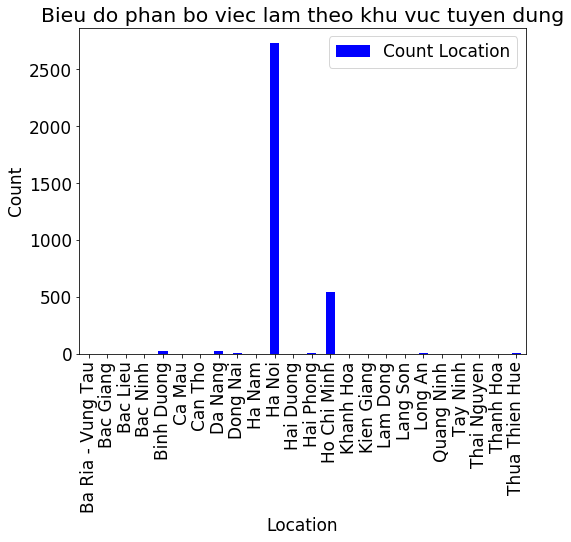

In [27]:
tableLocation.plot.bar(x = 'Name Location', color = 'blue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bieu do phan bo viec lam theo khu vuc tuyen dung')

Text(0.5,1,'Bieu do phan bo viec lam theo khu vuc tuyen dung')

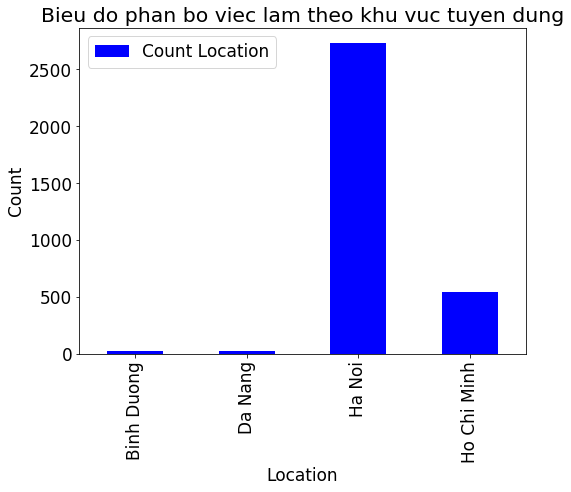

In [28]:
table_location_small.plot.bar(x = 'Name Location', color = 'blue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Bieu do phan bo viec lam theo khu vuc tuyen dung')

In [30]:

import re

def  language():
    list_skill = list(result['skill'])
    list_language, count_languages = [], []
    list_job_skill, count_job_it = [], []
    p = re.compile('[-/ ]|Khác')
    for skill in list_skill:
        if type(skill) is str:
         
            
            skill_search_one = p.findall(skill)
            if len(skill_search_one) == 0:
                list_language.append(skill)

            else:
                list_job_skill += skill.split(', ')
    
        else:
            list_skill.remove(skill)
                
    list_language = [i.lower() for i in list_language]
    p_game = re.compile('game')
    for i, item in enumerate(list_language):
        x = p_game.findall(item)
        if len(x) != 0:
            list_language[i] = 'game'
            

    get_languages = list(set([get_language for get_language in list_language if list_language.count(get_language) >=1 ]))
    get_languages.sort(reverse = False)

    
    for get_language in get_languages:
        count_language = list_language.count(get_language)
        count_languages.append(count_language)

    
    p_one = re.compile('ui')    
        
    list_job_skill = [i.lower() for i in list_job_skill]
    for i, item in enumerate(list_job_skill):
        x = p_one.findall(item)
        if len(x) != 0:
            list_job_skill[i] = 'ui design'
            
        
    get_list_job_skills = list(set([get_list_job_skill for get_list_job_skill in list_job_skill if list_job_skill.count(get_list_job_skill) >=1 ]))
    get_list_job_skills.sort(reverse = False)
    
    p_skill = re.compile('admin|viễn thông|ruby|design|react|web|manager|it|game|data|end|test|stack|business|an ninh mạng')
    list_job_it = []
    for i in get_list_job_skills:
        x = p_skill.findall(i)
        if len(x) != 0:
            list_job_it.append(i)
    
    for item in list_job_it:
        count_job_skill = list_job_skill.count(item)
        count_job_it.append(count_job_skill)
    
    return get_languages, list_job_it, count_languages, count_job_it
get_languages, list_job_it,  count_languages, count_job_it = language()

In [31]:
get_languages

['.net',
 'agile',
 'ai',
 'android',
 'angularjs',
 'asp.net',
 'blockchain',
 'c#',
 'c++',
 'cloud',
 'css',
 'devops',
 'django',
 'game',
 'html',
 'html5',
 'ios',
 'iot',
 'j2ee',
 'java',
 'javascript',
 'laravel',
 'linux',
 'machine',
 'manager',
 'mobile',
 'mysql',
 'nodejs',
 'oop',
 'oracle',
 'php',
 'python',
 'qa',
 'qc',
 'reactjs',
 'security',
 'sql',
 'swift',
 'tester',
 'unity',
 'vuejs',
 'wordpress']

In [32]:
count_languages

[136,
 4,
 75,
 155,
 111,
 24,
 35,
 51,
 144,
 70,
 17,
 24,
 24,
 123,
 1,
 10,
 116,
 48,
 5,
 62,
 131,
 124,
 6,
 98,
 1,
 1,
 2,
 16,
 2,
 1,
 241,
 111,
 13,
 107,
 4,
 38,
 97,
 7,
 122,
 13,
 1,
 1]

In [15]:
count_job_it

[71,
 2,
 50,
 2,
 46,
 14,
 1,
 140,
 34,
 1,
 10,
 14,
 45,
 12,
 2,
 3,
 32,
 41,
 95,
 79,
 4,
 5]

In [14]:
list_job_it

['an ninh mạng',
 'automation test',
 'back-end',
 'big data',
 'business analyst',
 'data analyst',
 'data analytics',
 'front-end',
 'full-stack',
 'game artist',
 'graphic design',
 'it phần cứng/mạng',
 'it phần mềm',
 'it/phần mềm/phần cứng',
 'product manager',
 'react native',
 'ruby on rails',
 'system admin',
 'thiết kế đồ họa - web',
 'ui design',
 'điện tử viễn thông',
 'điện tử/viễn thông']

In [33]:
data_it_job = pd.DataFrame({'name_it_job': list_job_it, 'count_skill_job': count_job_it})

In [34]:
data_it_job

,count_skill_job,name_it_job
0,71,an ninh mạng
1,2,automation test
2,50,back-end
3,2,big data
4,46,business analyst
5,14,data analyst
6,1,data analytics
7,140,front-end
8,34,full-stack
9,1,game artist


Text(0.5,1,'Bieu do phan bo it job theo nhom nganh')

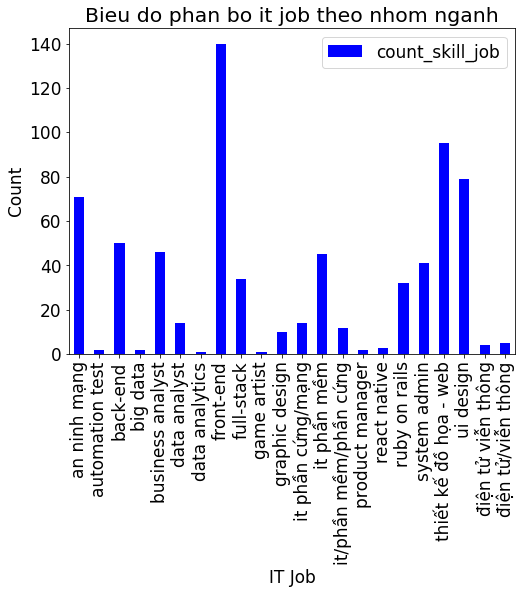

In [35]:
data_it_job.plot.bar(x = 'name_it_job', color = 'blue')
plt.xlabel('IT Job')
plt.ylabel('Count')
plt.title('Bieu do phan bo it job theo nhom nganh')


In [36]:
data_language = pd.DataFrame({'name_language': get_languages, 'count': count_languages})
data_language_small = data_language[data_language['count'] >= 10]

In [37]:
data_language

,count,name_language
0,136,.net
1,4,agile
2,75,ai
3,155,android
4,111,angularjs
5,24,asp.net
6,35,blockchain
7,51,c#
8,144,c++
9,70,cloud


In [38]:
data_language_small

,count,name_language
0,136,.net
2,75,ai
3,155,android
4,111,angularjs
5,24,asp.net
6,35,blockchain
7,51,c#
8,144,c++
9,70,cloud
10,17,css


/home/tuyet/.local/lib/python3.5/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5,1,'Bieu do phan bo theo ngon ngu')

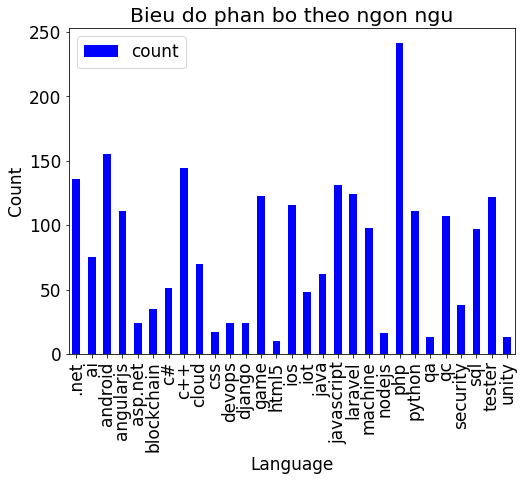

In [39]:
data_language_small.plot.bar(x = 'name_language', colors='b')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Bieu do phan bo theo ngon ngu')

local input: Binh Duong


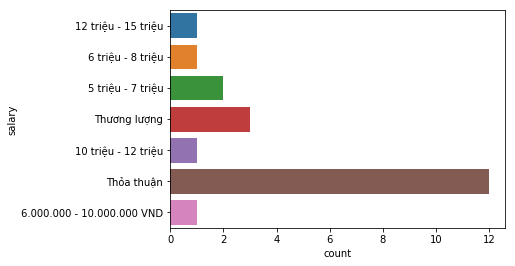

In [24]:
local = str(input('local input: '))
local_data = (result[result['address'] == local])
sns.countplot(y=local_data['salary'])

skill input: Python


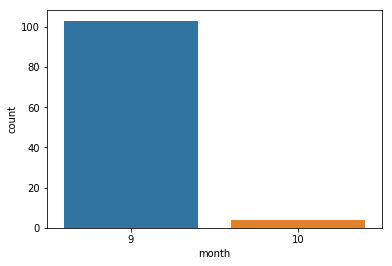

In [29]:
skill = str(input('skill input: '))
skill_data = (result[result['skill'] == skill])
sns.countplot(x=skill_data['month'])

skill input: AI


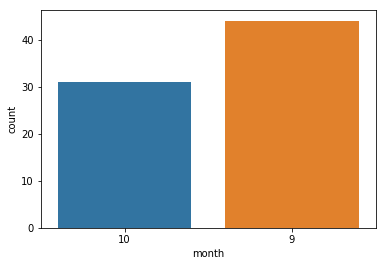

In [31]:
skill = str(input('skill input: '))
skill_data = (result[result['skill'] == skill])
sns.countplot(x=skill_data['month'])

month input: 8


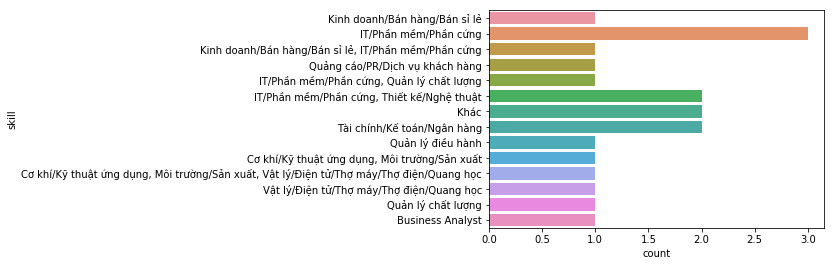

In [44]:
month = str(input('month input: '))
month_data = (result[result['month'] == month])
sns.countplot(y=month_data['skill'])